In [1]:
import cv2
import numpy as np


img = cv2.imread('./hat_1/page_15.jpg')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.bilateralFilter(gray, 11, 17, 17)

kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(gray,kernel,iterations = 2)
kernel = np.ones((4,4),np.uint8)
dilation = cv2.dilate(erosion,kernel,iterations = 2)

In [2]:
edged = cv2.Canny(dilation, 30, 200)

In [3]:
cnt, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


295 62071.5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

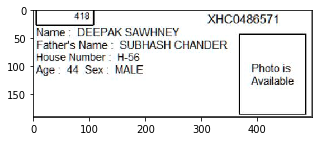

In [5]:
for i in range(len(cnt)):

    area = cv2.contourArea(cnt[i])
    if area>36000 and area<100000 and i<296: 
        print(i, area)
        x,y,w,h = cv2.boundingRect(cnt[i])
        crop= img[ y:h+y,x:w+x]
        plt.figure(figsize= (5,5))
        plt.imshow(crop)
        plt.show()
#         cv2.imwrite('cropped' + fileName[i] + '_'+ '.jpg', crop)
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

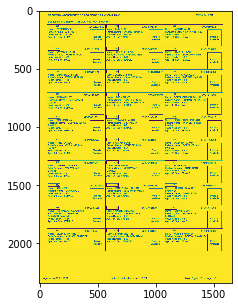

In [6]:
        plt.figure(figsize= (5,5))
        plt.imshow(gray)
        plt.show()

In [13]:

from tesseract2dict import TessToDict
td=TessToDict()
# inputImage=cv2.imread('path/to/image.jpg')
### function 1

In [ ]:
word_dict=td.tess2dict(crop,'out','outfolder')

In [10]:
### function 2
text_plain=td.word2text(word_dict,(0,0,crop.shape[1],crop.shape[0]))

In [12]:
print(text_plain)

a8 XHC0486571
Name : DEEPAK SAWHNEY
Father's Name : SUBHASH CHANDER
House Number = H-56
Age: 44 Sex: MALE Photo is
Available
 
